In [1]:

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
%config InlineBackend.figure_format = 'retina'
import pandas as pd

In [2]:
#let's open a file to write in all the data

f= open("He_data.txt","w")
f.write("Volume 1_omega_0 o_error beta b_error 2_omega_0 o_error beta b_error 3_omega_0 o_error beta b_error 4_omega_0 o_error beta b_error 5_omega_0 o_error beta b_error 6_omega_0 o_error beta b_error\n")
f.close()

# This cell should be type code for the first run through and then made into markdown.
#this cell creates and writes the first line for the txt file

In [3]:
# code imports all data from a gas file and assigns a specific variable name to each data set.
# eg. 100-a.csv, is split into 2 variables: 'hundred_a_time' and 'hundred_a_voltage'


# for the n-th row: data_array[n]
# for the n-th row, ml column (2nd column, with indexing starting at 0): data_array[n][2]

data_array = np.ones((3,60))
numb_1 = ['10', '20', '30', '40', '50', '60', '70', '80', '90', '100']
numb_2 = ["ten", "twenty", "thirty", "fourty", "fifty", "sixty", "seventy", "eighty", "ninety", "hundred"]
alph = ["a", "b", "c", "d", "e", "f"]
letter_list = 10 * alph
ml_list = []
for i in range (10, 110, 10):
    ml_col = [i for n in range(6)]
    ml_list += ml_col
list1 = 60 * [1]
data_array = np.column_stack((list1, ml_list, letter_list))

# for loop to create the list of data names with each ml and letter, eg '30ml-b.csv' 
for n in range(60):
    ml = data_array[n][1]
    letter = data_array[n][2]
    data_array[n][0] = F"{ml}ml-{letter}.csv"
    

# we find which row the data_name is in from our data_array, then we make the ml and letter variables, then we do ml.letter.time and ml.letter.voltage so we can plot the variables

def read_data(data_name):
    for n in range(60):
        if data_array[n][0] == data_name:
            letter = data_array[n][2]
            for m in range(10):
                if numb_1[m] == data_array[n][1]:
                    ml = numb_2[m]
                    break

            
    data = pd.read_csv(data_name, skiprows = 2, names = ['time', 'voltage'])
    globals()[f"{ml}_{letter}_time"] = data['time'].values.tolist()
    globals()[f"{ml}_{letter}_voltage"] = data['voltage'].values.tolist()

for n in range(60):
    #print(data_array[n][0])
    data_name = str(data_array[n][0])
    read_data(data_name)
    
#print('fifty_e_time', fifty_e_time)
#print('')
#print('eighty_d_voltage', eighty_d_voltage)


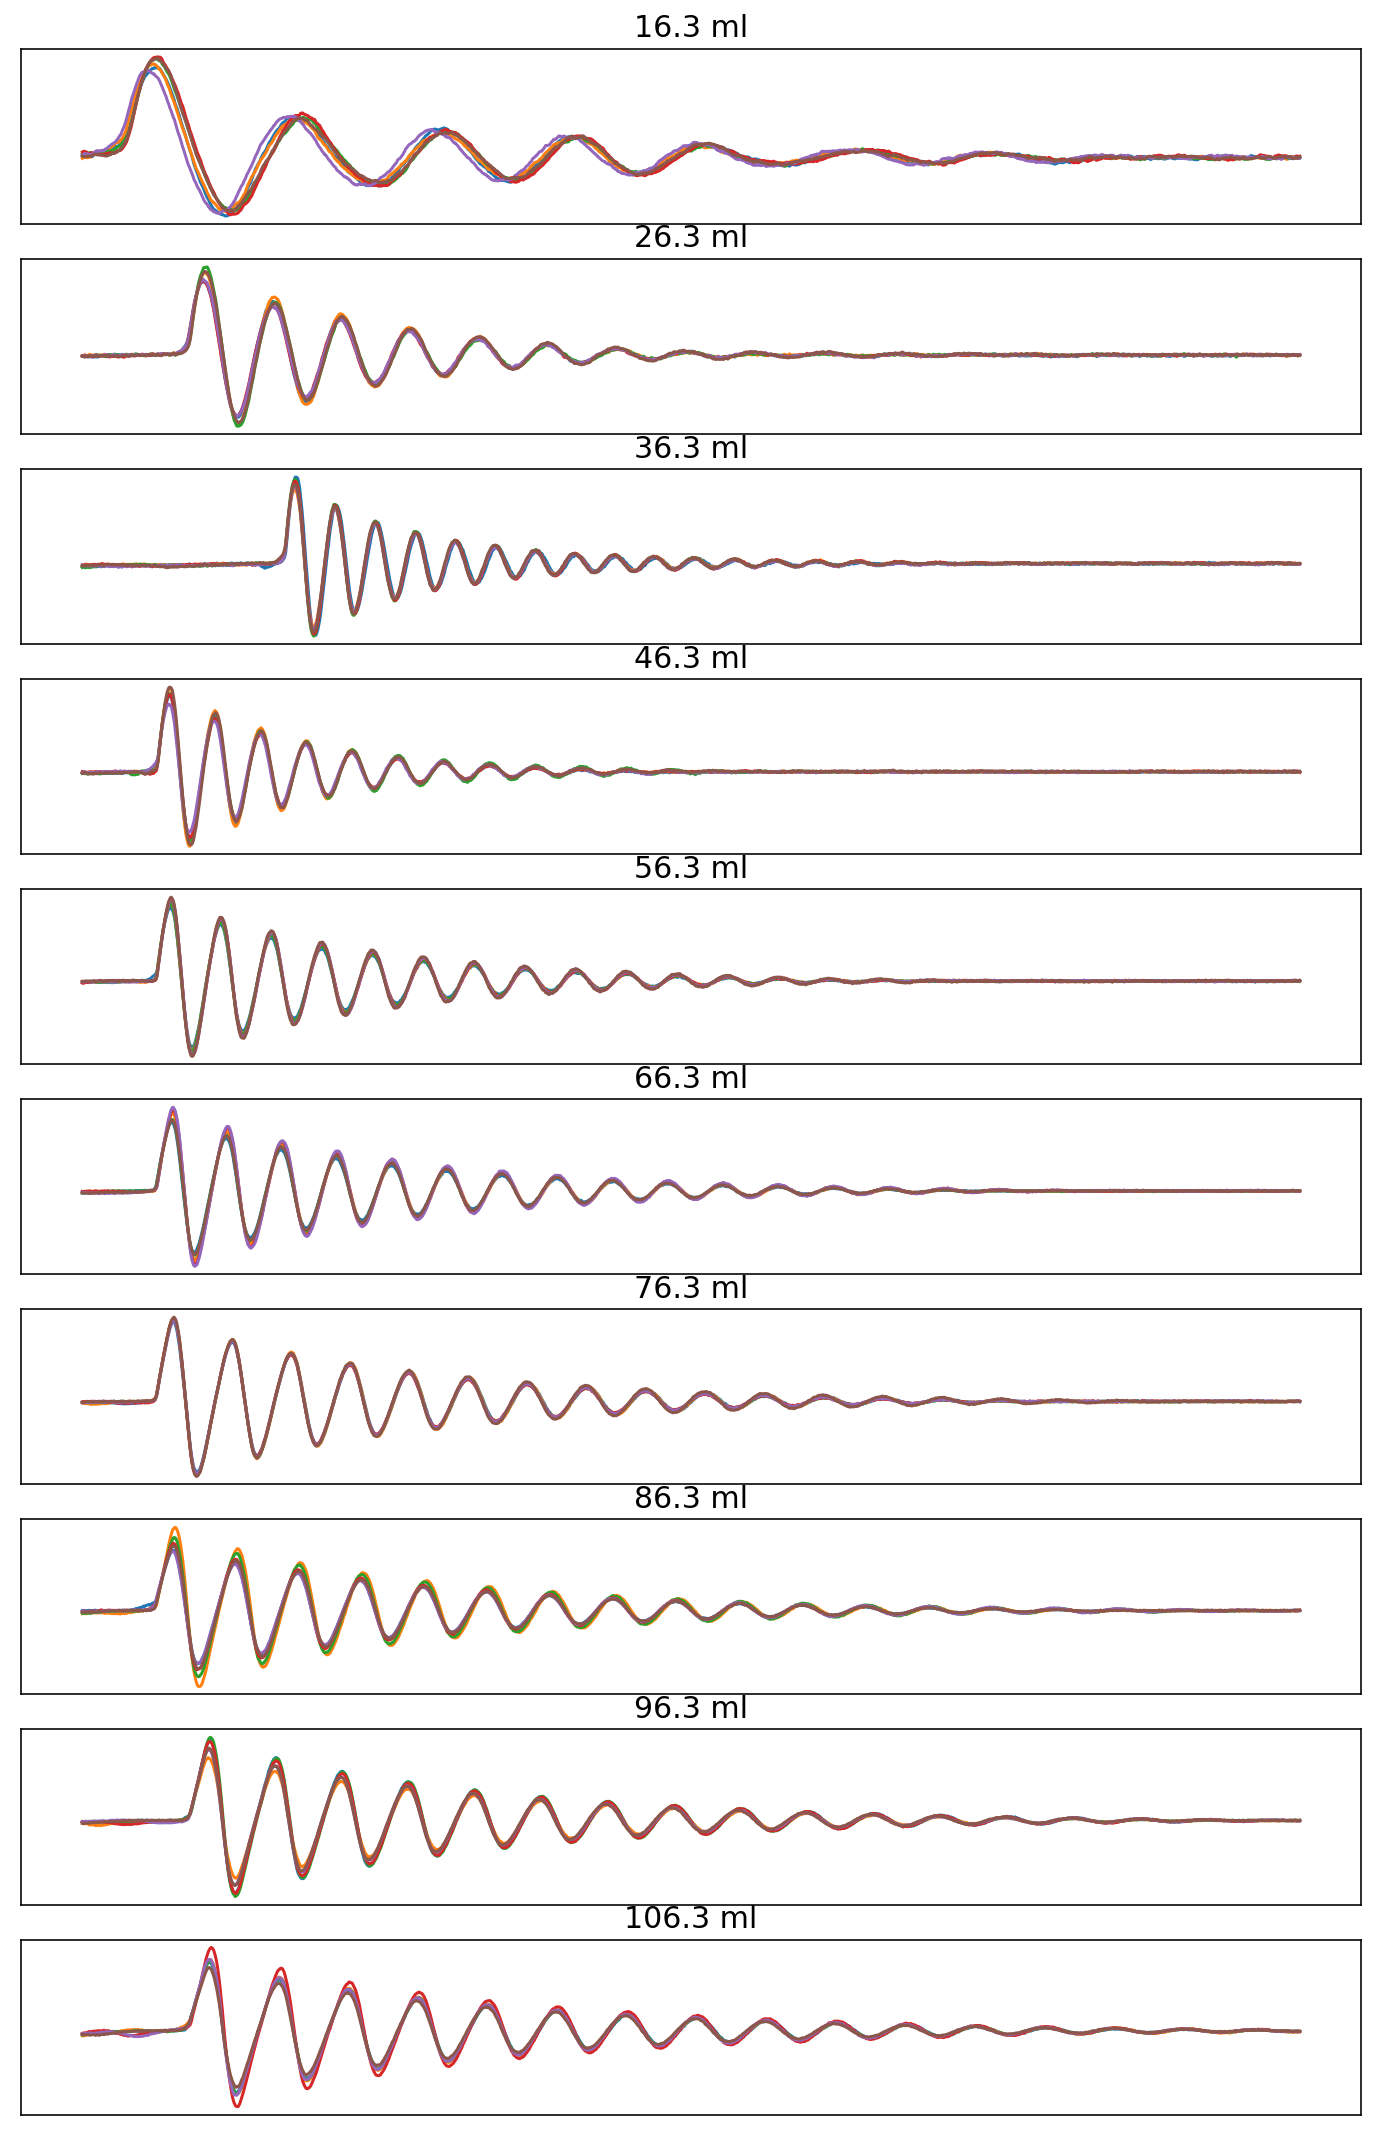

In [4]:
#plot all data on a 2 by 5 subplotlot just for a quick comparison
#different volumes aare plotted on a separate subplot with the 6 repeats on top. 

numb_1 = ['16.3', '26.3', '36.3', '46.3', '56.3', '66.3', '76.3', '86.3', '96.3', '106.3']

fig = plt.figure(figsize=(12, 19))
for k in range (1, 11):
    globals()[f"ax{k}"] = fig.add_subplot(10,1,k)

    
k = 1
while k < 11:
    for j in numb_2:
        for i in alph:
            time = globals()[f"{j}_{i}_time"]   #globals()[f"my_variable{i}"] = f"Hello from variable number {i}!"
            voltage = globals()[f"{j}_{i}_voltage"]
            globals()[f"ax{k}"].plot(time, voltage)
            globals()[f"ax{k}"].set_xticks([])
            globals()[f"ax{k}"].set_yticks([])
            globals()[f"ax{k}"].set_title(f"{numb_1[k-1]} ml", fontsize = 15)
        k += 1

plt.savefig("He_all_data_2.png")    
   

# Volume specific analysis:


Text(0, 0.5, 'EMF / V')

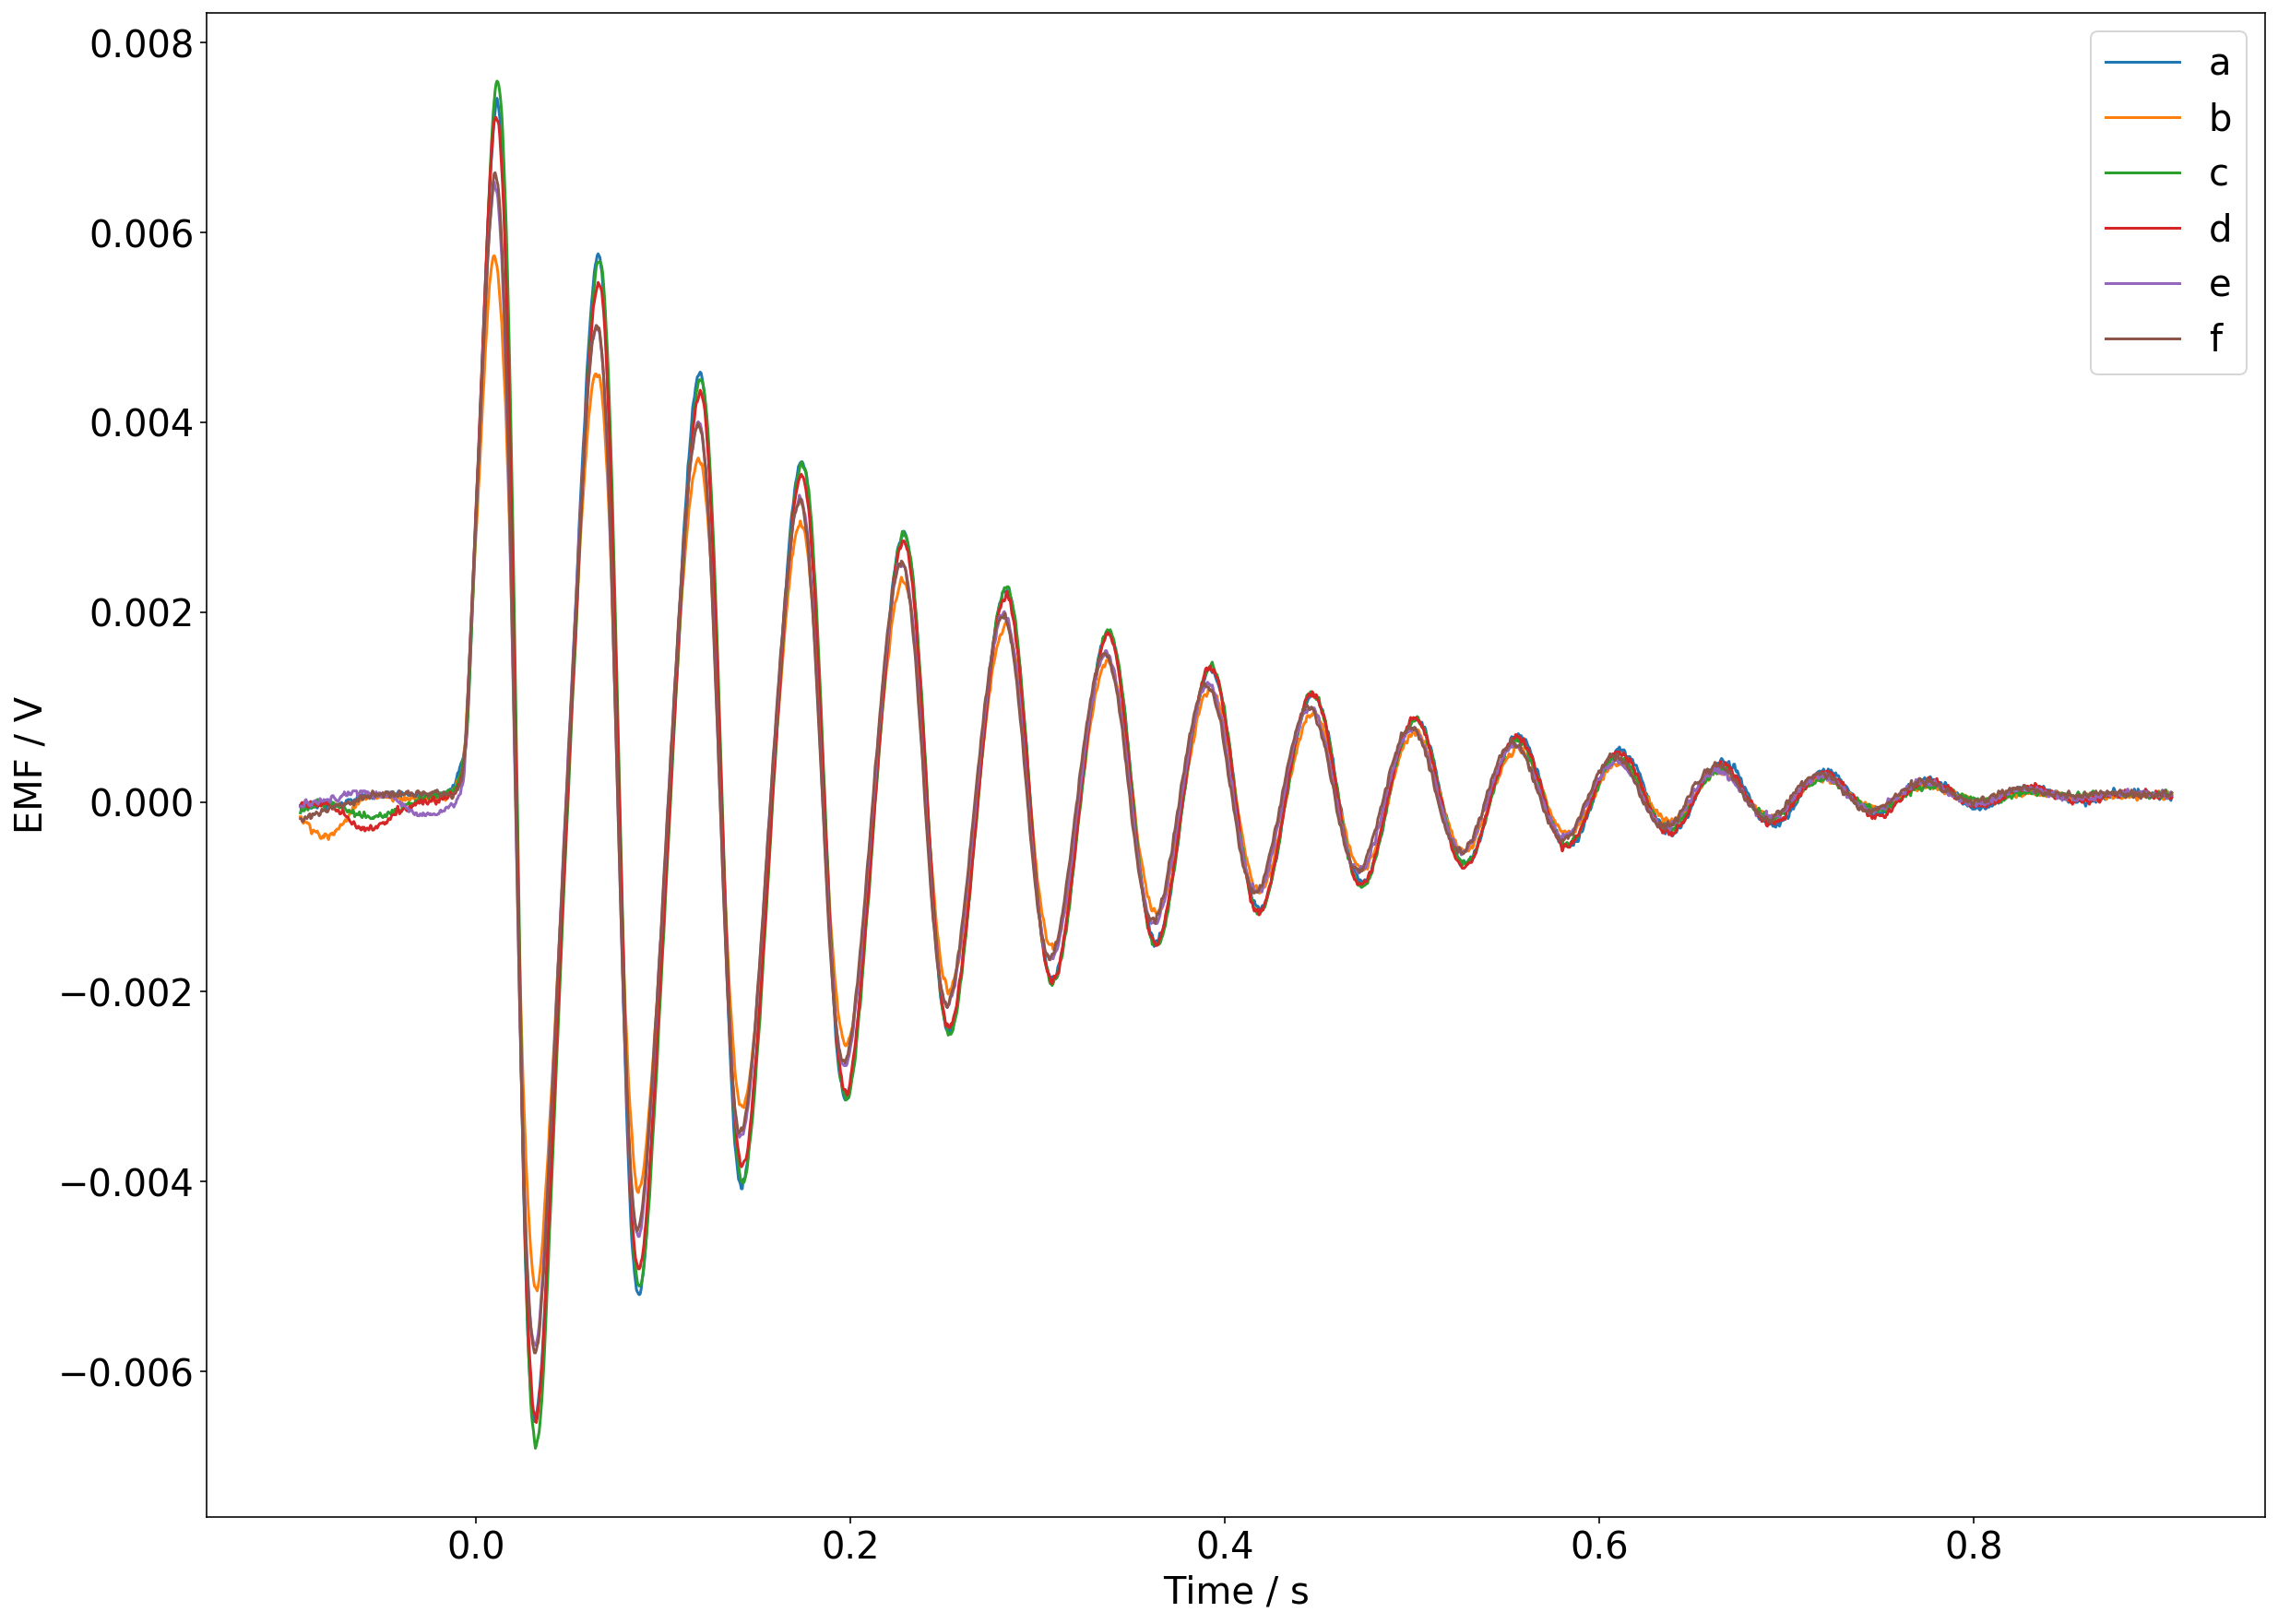

In [5]:
#let's zoom into each plot individuallly
#indexs  = [ 0,     1,         2,       3,       4,        5,        6,         7,        8,        9     ]
#numb_2 = ["ten", "twenty", "thirty", "fourty", "fifty", "sixty", "seventy", "eighty", "ninety", "hundred"]
vol_list = [16.3, 26.3, 36.3, 46.3, 56.3, 66.3, 76.3, 86.3, 96.3, 106.3]
fig = plt.figure(figsize=(20, 15))
V = numb_2[8]                #TO CHANGE THE VOLUME BEING MEASURED JUST CHANGE INDEX LOOKING AT ABOVE LIST
vol = vol_list[8]
j = 0
while j < 6:
    for i in alph:
        time = globals()[f"{V}_{i}_time"]         
        voltage = globals()[f"{V}_{i}_voltage"]
        plt.plot(time, voltage, label = alph[j])
        j += 1
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Time / s", size = 20)
plt.ylabel("EMF / V", size = 20)


In [6]:
#now time to repeat analysis pipeline from preliminary data
#start with cleaning the data 
cut_off_point = float(input("Looking at the graph above suggest a cut off point where the graph becomes noisy: "))
print(cut_off_point)

Looking at the graph above suggest a cut off point where the graph becomes noisy: 0.6
0.6


In [7]:
# let's check the length of each repeat to check if the code in the next secion works
for letter in alph:
    print(len(globals()[f"{V}_{letter}_time"]))
    

2000
2000
2000
2000
2000
2000


In [8]:
#clean each data for the 6 repeats at once

for letter in alph:
    globals()[f"time_{letter}_clean"] = []         #new clean time
    globals()[f"voltage_{letter}_clean"] = []      #new clean voltage
    for index in range(0, len(globals()[f"{V}_{letter}_time"])):
        if globals()[f"{V}_{letter}_time"][index] >= 0 and globals()[f"{V}_{letter}_time"][index] <= cut_off_point:
            globals()[f"time_{letter}_clean"].append(globals()[f"{V}_{letter}_time"][index])
            globals()[f"voltage_{letter}_clean"].append(globals()[f"{V}_{letter}_voltage"][index])
    print("Original length = " ,len(globals()[f"{V}_{letter}_time"]))
    print("New_length =      " ,len(globals()[f"time_{letter}_clean"]))
    
    
# variable names for the clean lists are, time_a_clean, voltage_a_clean

Original length =  2000
New_length =       1200
Original length =  2000
New_length =       1200
Original length =  2000
New_length =       1200
Original length =  2000
New_length =       1200
Original length =  2000
New_length =       1200
Original length =  2000
New_length =       1200


Text(0, 0.5, 'EMF / V')

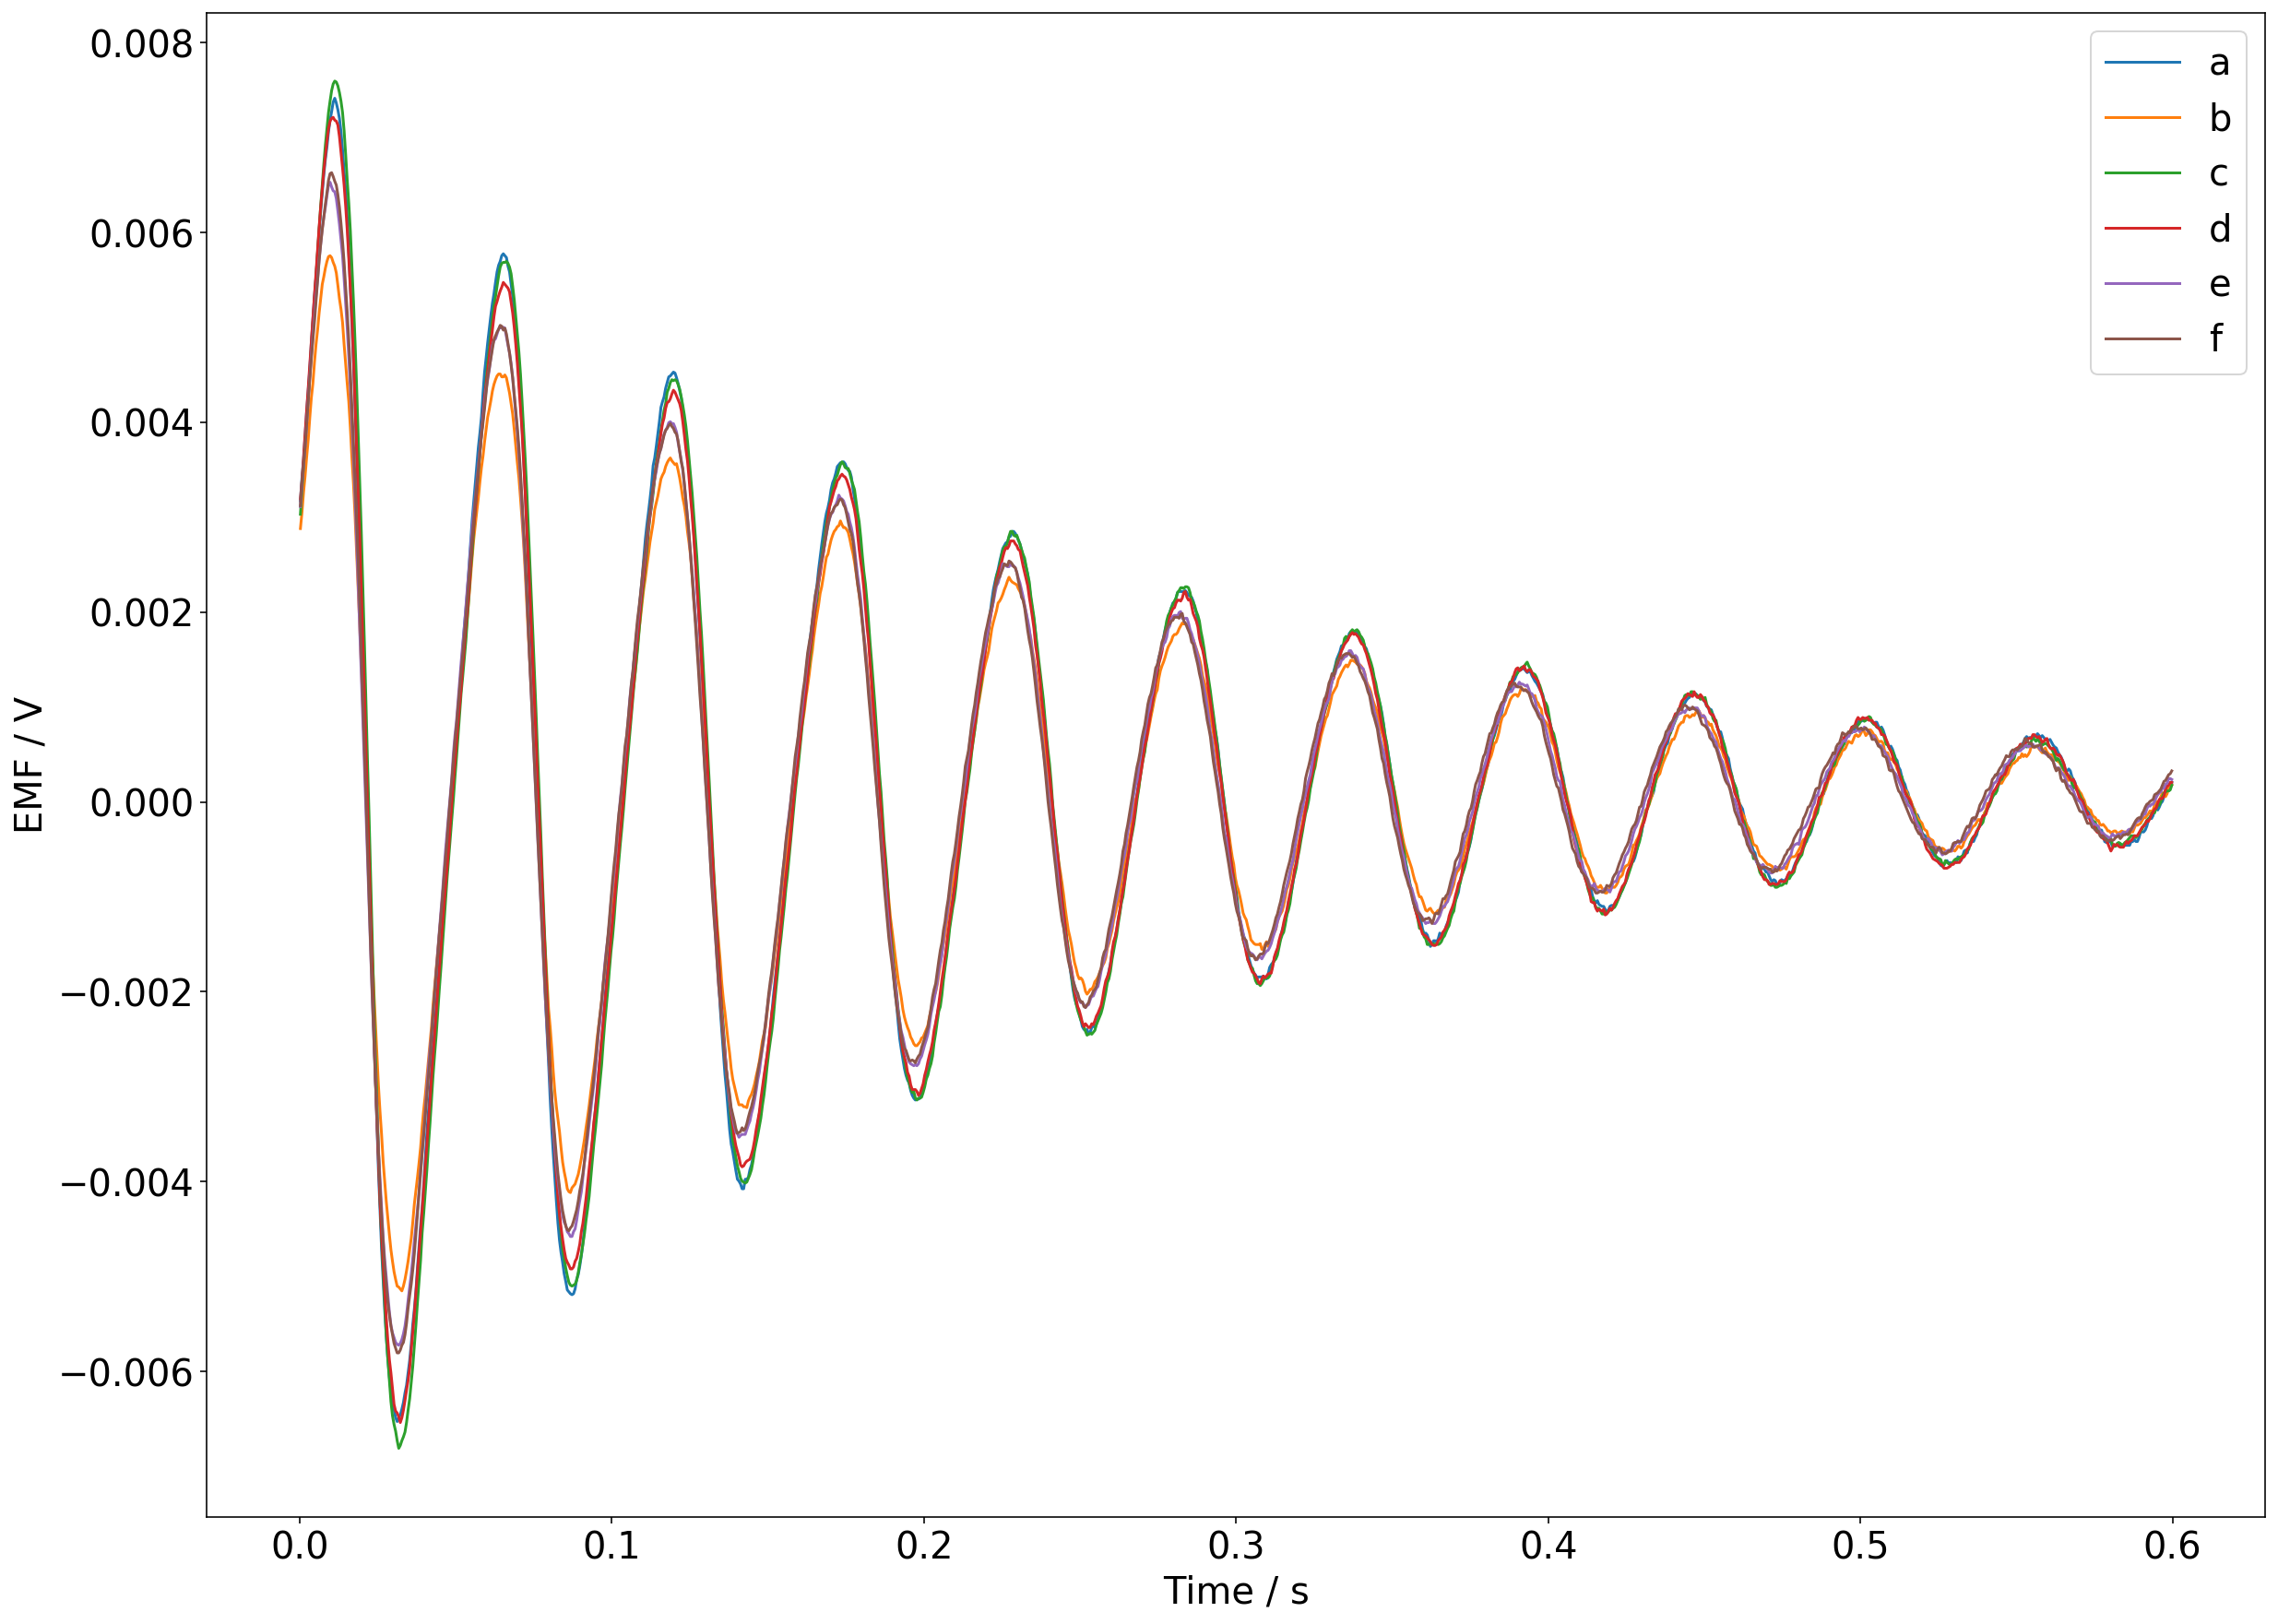

In [9]:
#plot the clean version ofthe plots
#indexs  = [ 0,     1,         2,       3,       4,        5,        6,         7,        8,        9     ]
#numb_2 = ["ten", "twenty", "thirty", "fourty", "fifty", "sixty", "seventy", "eighty", "ninety", "hundred"]
fig = plt.figure(figsize=(20, 15))

for letter in alph:
    time = globals()[f"time_{letter}_clean"]         
    voltage = globals()[f"voltage_{letter}_clean"]
    plt.plot(time, voltage, label = letter)

plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Time / s", size = 20)
plt.ylabel("EMF / V", size = 20)

### remember to change parameters according to gas

In [10]:
#now we can Finally start with the fit!!
#define variables 
#Defining constant variables:

P_0 = 101100                    # Atmospheric Pressure in Pa
g = 9.81                        # gravitational constant
m = 106.3e-3                     # mass of plunger + magnet in kg   
d = 34.16e-3                    #diameter in m
a = np.pi * (d/2)**2            #cross-sectional area in m^2
P = P_0 + ((m*g)/a)             #Pressure of gas
constant = m/(P*a**2)
print(constant)
print(P)

1.2378568909703336
102237.82813020048


In [11]:
#error_analysis

m_err = 0.01e-3                 # error in mass
P_0_err = 100
d_err = 0.01e-3
a_err = (np.pi/4) * (2 * d_err)
p_err = np.sqrt(((m*g*a_err)/a**2)**2 + (P_0_err)**2)

const_err = (m/a**2) * (1/P**2) * p_err  #ignoring area error since it is negligilble compared to pressure error
print(const_err)

print(f"constant = {constant} +/- {const_err}")

0.0012335707445499922
constant = 1.2378568909703336 +/- 0.0012335707445499922


A = -0.025074654896121026 +/- 0.00015276978079270675
b = 0.8896767074826568 +/- 0.00831472615207849
omega_star = 114.584888230704 +/- 0.04057199723264006
phi = 0.6580671451568283 +/- 0.006571850720544247


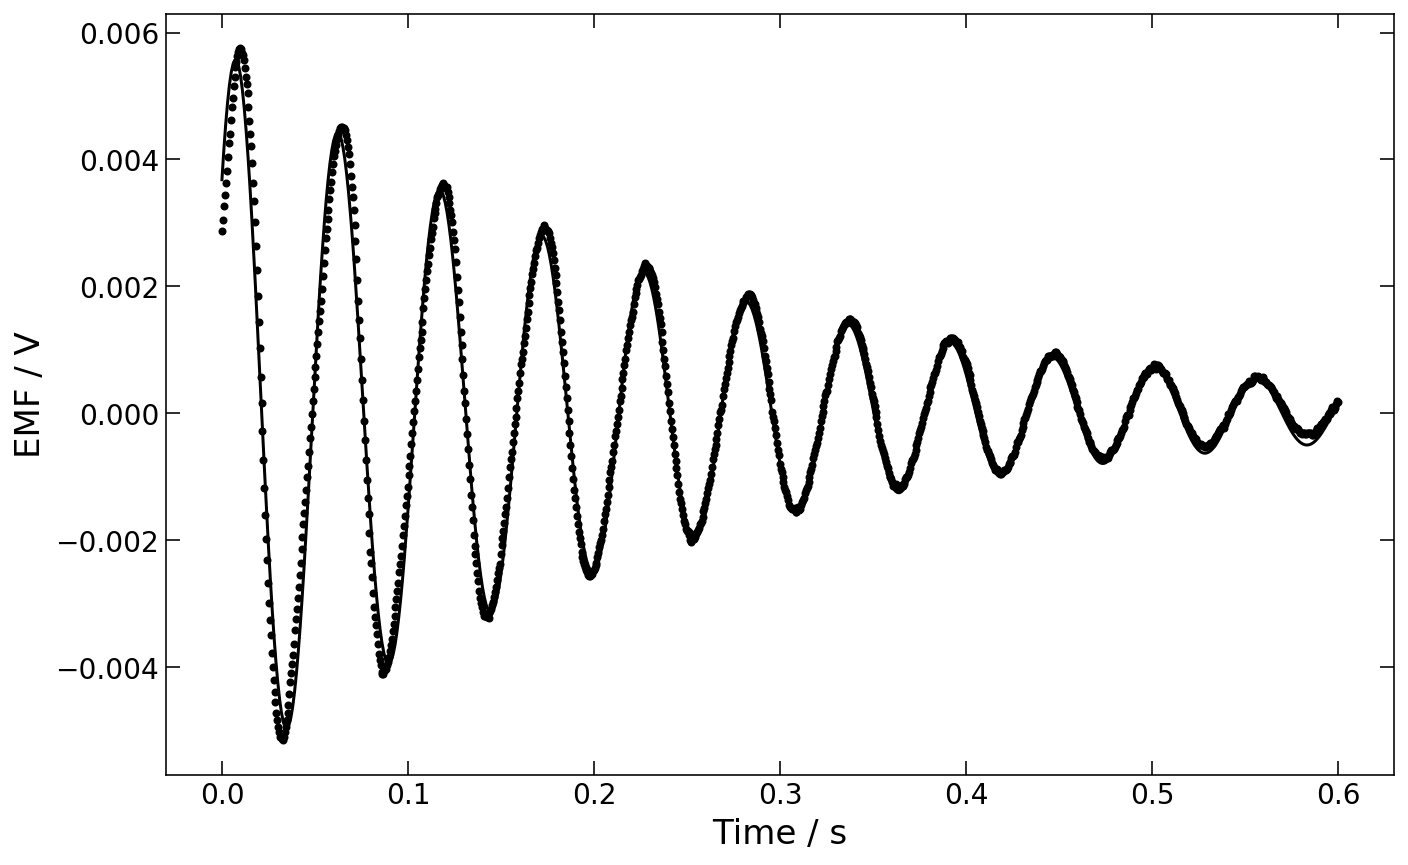

In [12]:
#this is the code for the fit, first just try with the first repeat then modify so that all 6 repeats are fitted at once
# a normal exp*cos fit is used for now since for some reason the derived equation fit isn't fitting well. 


emf_constant = 0.002 #from izzy's EMF analysis

#open a file to write the results into

def fit(time, A, b, omega_star, phi):
    beta = b/(2*m)    
    exp_term = -A*np.exp(-beta*time)
    sin = omega_star * np.sin(time*omega_star + phi)
    cos = beta* np.cos(omega_star*time + phi)

    return emf_constant * exp_term*(sin + cos)

time = np.arange(0, cut_off_point, 0.001)

#def fit(time, A, b, omega_star, phi):
 #   beta = b/(2*m)    
  #  exp_term = A*np.exp(-beta*time)
   # cos = np.cos(omega_star*time + phi)

    #return exp_term*(cos)


    
popt, pcov = curve_fit(fit, time_b_clean, voltage_b_clean)
print("A =", popt[0], "+/-", pcov[0,0]**0.5)
print("b =", popt[1], "+/-", pcov[1,1]**0.5)
print("omega_star =", popt[2], "+/-", pcov[2,2]**0.5)
print("phi =", popt[3], "+/-", pcov[3,3]**0.5)

A = popt[0]
b = popt[1]
omega_star = popt[2]
phi = popt[3]
omega_star_err = pcov[2,2]**0.5

fig = plt.figure(figsize=(11,7))
ax = fig.add_subplot(111)
plt.plot(time, fit(time, A, b, omega_star, phi), color = "black", linewidth = 1.5)
plt.plot(time_b_clean, voltage_b_clean, marker = 'o', color = 'black', ls = 'none', markersize = 3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Time / s", size = 17)
plt.ylabel("EMF / V", size = 17)
plt.tick_params(direction='in',      # I like 'in', could be 'out' or both 'inout'
                length=7,            # A reasonable length
                bottom='on',         # I want ticks on the bottom axes
                left='on',
                top='on',
                right='on')
plt.plot()

plt.savefig("He_60_fit")

In [13]:
#code which iterates accross all variables 

print( V + " ml:")
print("")

#open the file to write data into
f = open("He_data.txt", "a")
f.write("\n")
f.write(str(vol))

time = np.arange(0, cut_off_point, 0.0001)


for letter in alph:
    
    popt, pcov = curve_fit(fit, globals()[f"time_{letter}_clean"], globals()[f"voltage_{letter}_clean"])
    A = popt[0]
    A_err = pcov[0,0]**0.5
    b = popt[1]
    b_err = pcov[1,1]**0.5
    omega_star = popt[2]
    omega_star_err = pcov[2,2]**0.5
    phi = popt[3]
    phi_err = pcov[3,3]**0.5
    
    
    print(letter)
    print('')
    print("A =", popt[0], "+/-", pcov[0,0]**0.5)
    print("b =", popt[1], "+/-", pcov[1,1]**0.5)
    print("phi =", popt[3], "+/-", pcov[3,3]**0.5)
    print("OMEGA_STAR =", popt[2], "+/-", pcov[2,2]**0.5)
    
    def beta():
        return b/(2*m)
    def beta_err():
        frac_err = 0.5 * np.sqrt(((pcov[1,1]**0.5)/(popt[1]))**2 + (m_err/m)**2)
        return frac_err * beta()
    print(f"beta = {beta()} +/- {beta_err()}")
    def omega_0():
        return np.sqrt(omega_star**2 + beta()**2)
    def omega_0_err():
        return ((pcov[2,2]**0.5)/popt[2]) * omega_0()
    print(f"OMEGA_0 = {omega_0()} +/- {omega_0_err()}")
    print('')
    
    f.write(f" {omega_0()} {omega_0_err()} {beta()} {beta_err()}")
    
f.close()

ninety ml:

a

A = -0.03135217118757576 +/- 0.00023878962382247224
b = 0.9074683643018663 +/- 0.010559335466004002
phi = 0.625598454035679 +/- 0.00821631190906946
OMEGA_STAR = 114.67065941256641 +/- 0.05150327832833278
beta = 4.268430688155533 +/- 0.02483462029252015
OMEGA_0 = 114.75007464334128 +/- 0.05153894695320212

b

A = -0.025074654896121026 +/- 0.00015276978079270675
b = 0.8896767074826568 +/- 0.00831472615207849
phi = 0.6580671451568283 +/- 0.006571850720544247
OMEGA_STAR = 114.584888230704 +/- 0.04057199723264006
beta = 4.184744625976749 +/- 0.01955584988725525
OMEGA_0 = 114.66127811265478 +/- 0.04059904521537988

c

A = -0.03198426635379945 +/- 0.00024500002377033395
b = 0.9245848717792787 +/- 0.010775794041307234
phi = 0.5530015741134643 +/- 0.00824256520316018
OMEGA_STAR = 114.84232737221149 +/- 0.05244213763757914
beta = 4.3489410713983006 +/- 0.025343709003855453
OMEGA_0 = 114.92464246065197 +/- 0.052479726384658906

d

A = -0.030624175243346333 +/- 0.0002226416682739209